# Using LSTM for Time series prediction i.e. Sine Wave

In [1]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import keras
from keras import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
%matplotlib inline

Using TensorFlow backend.


Text(0.5,1,'Sine Wave')

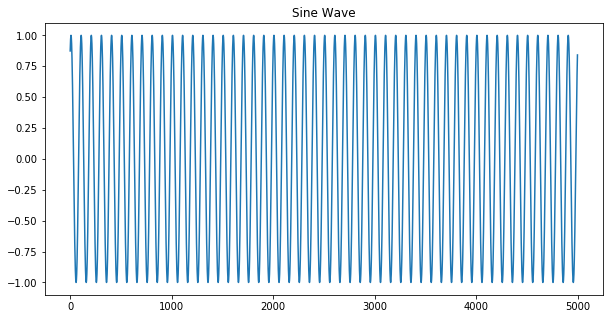

In [2]:
dataframe = pd.read_csv("../datasets/sine-wave.csv")
plt.figure(figsize=(10,5))
plt.plot(dataframe)
plt.title("Sine Wave")

use a moving forward window of size 50, which means we will use the first 50 data points as out input X to predict y1 — 51st data point. Next, we will use the window between 1 to 51 data points as input X to predict y2 i.e., the 52nd data point and so on

Text(0.5,1,'first 50 points')

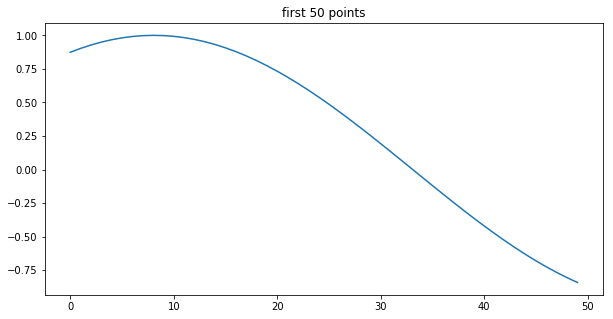

In [3]:
plt.figure(figsize=(10,5))

plt.plot(dataframe[:50])
plt.title("first 50 points")

## Prepare the dataset

This includes:

i. Normalization of the feature values

ii. Convert the dataset in the time series(up to certain steps)

iii. Split the dataset into training and test 

### 1. Normalization of the feature values

In [4]:
# Preparing the dataset
# normalize the values between -1 and 1
# .fit_Transform function is used to find minimum and maximum values in the data and normalize according to that.
# Since we are normalizing values b/w -1 and 1. 
# So after predictions, we have transform again into original form. If needed, the transform can be inverted. 
# This is useful for converting predictions back into their original scale for reporting or plotting. 
# This can be done by calling the inverse_transform() function
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(dataframe.values)
scaled_dataframe = pd.DataFrame(scaled_data)

### 2. Convert the dataset in the time series

In [5]:
# Window size 
#Fix the moving window size to be 50. 
# For this purpose we use pandas shift function that shifts the entire column by the number we specify. 

# we shifted the column up by 1 (hence used -1. we want to predict future values) 
# If we want to shift it down by 1, we will have to use +1) and then concatenate that to the original data.

window_size = 50
copied_dataframe = scaled_dataframe.copy()

for i in range(window_size):
    
    scaled_dataframe = pd.concat([scaled_dataframe, copied_dataframe.shift(-(i+1))], axis=1)
    
scaled_dataframe


,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.873749,0.902566,0.927822,0.949416,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,...,-0.477101,-0.531344,-0.583490,-0.633333,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749
1,0.902566,0.927822,0.949416,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,0.992780,...,-0.531344,-0.583490,-0.633333,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749,-0.902566
2,0.927822,0.949416,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,0.992780,0.983282,...,-0.583490,-0.633333,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749,-0.902566,-0.927822
3,0.949416,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,0.992780,0.983282,0.969904,...,-0.633333,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749,-0.902566,-0.927822,-0.949416
4,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,0.992780,0.983282,0.969904,0.952697,...,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749,-0.902566,-0.927822,-0.949416,-0.967263
5,0.981292,0.991449,0.997693,1.000000,0.998360,0.992780,0.983282,0.969904,0.952697,0.931731,...,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749,-0.902566,-0.927822,-0.949416,-0.967263,-0.981292
6,0.991449,0.997693,1.000000,0.998360,0.992780,0.983282,0.969904,0.952697,0.931731,0.907088,...,-0.767129,-0.805896,-0.841483,-0.873749,-0.902566,-0.927822,-0.949416,-0.967263,-0.981292,-0.991449
7,0.997693,1.000000,0.998360,0.992780,0.983282,0.969904,0.952697,0.931731,0.907088,0.878865,...,-0.805896,-0.841483,-0.873749,-0.902566,-0.927822,-0.949416,-0.967263,-0.981292,-0.991449,-0.997693
8,1.000000,0.998360,0.992780,0.983282,0.969904,0.952697,0.931731,0.907088,0.878865,0.847173,...,-0.841483,-0.873749,-0.902566,-0.927822,-0.949416,-0.967263,-0.981292,-0.991449,-0.997693,-1.000000
9,0.998360,0.992780,0.983282,0.969904,0.952697,0.931731,0.907088,0.878865,0.847173,0.812138,...,-0.873749,-0.902566,-0.927822,-0.949416,-0.967263,-0.981292,-0.991449,-0.997693,-1.000000,-0.998360


In [6]:
# Remove missing values 
scaled_dataframe.dropna(axis=0, inplace=True)
scaled_dataframe

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.873749,0.902566,0.927822,0.949416,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,...,-0.477101,-0.531344,-0.583490,-0.633333,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749
1,0.902566,0.927822,0.949416,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,0.992780,...,-0.531344,-0.583490,-0.633333,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749,-0.902566
2,0.927822,0.949416,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,0.992780,0.983282,...,-0.583490,-0.633333,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749,-0.902566,-0.927822
3,0.949416,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,0.992780,0.983282,0.969904,...,-0.633333,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749,-0.902566,-0.927822,-0.949416
4,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,0.992780,0.983282,0.969904,0.952697,...,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749,-0.902566,-0.927822,-0.949416,-0.967263
5,0.981292,0.991449,0.997693,1.000000,0.998360,0.992780,0.983282,0.969904,0.952697,0.931731,...,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749,-0.902566,-0.927822,-0.949416,-0.967263,-0.981292
6,0.991449,0.997693,1.000000,0.998360,0.992780,0.983282,0.969904,0.952697,0.931731,0.907088,...,-0.767129,-0.805896,-0.841483,-0.873749,-0.902566,-0.927822,-0.949416,-0.967263,-0.981292,-0.991449
7,0.997693,1.000000,0.998360,0.992780,0.983282,0.969904,0.952697,0.931731,0.907088,0.878865,...,-0.805896,-0.841483,-0.873749,-0.902566,-0.927822,-0.949416,-0.967263,-0.981292,-0.991449,-0.997693
8,1.000000,0.998360,0.992780,0.983282,0.969904,0.952697,0.931731,0.907088,0.878865,0.847173,...,-0.841483,-0.873749,-0.902566,-0.927822,-0.949416,-0.967263,-0.981292,-0.991449,-0.997693,-1.000000
9,0.998360,0.992780,0.983282,0.969904,0.952697,0.931731,0.907088,0.878865,0.847173,0.812138,...,-0.873749,-0.902566,-0.927822,-0.949416,-0.967263,-0.981292,-0.991449,-0.997693,-1.000000,-0.998360


### Split the dataset for training and testing

In [7]:
split_data = int(round(0.8*scaled_dataframe.shape[0]))
split_data

3960

In [8]:
train_data = scaled_dataframe.iloc[:split_data,:]
test_data = scaled_dataframe.iloc[split_data:,:]

train_data = shuffle(train_data)


In [9]:
# Consider last column as output
train_data_x = train_data.iloc[:,:-1]
train_data_y = train_data.iloc[:,-1]
test_data_x = test_data.iloc[:,:-1]
test_data_y = test_data.iloc[:,-1]
print "train features shape ", train_data_x.shape
print "train label shape ", train_data_y.shape
print "test data y ", test_data_y.shape

train features shape  (3960, 50)
train label shape  (3960,)
test data y  (990,)


# Define Model Parameters

In [10]:
# Reshape it for LSTM 
train_data_x = np.array(train_data_x)
test_data_x = np.array(test_data_x)
# print train_data_x.shape[0], train_data_x.shape[1]
train_data_x = train_data_x.reshape(train_data_x.shape[0],train_data_x.shape[1],1)
test_data_x = test_data_x.reshape(test_data_x.shape[0],test_data_x.shape[1],1)
print "Reshape train example x ", train_data_x.shape
print "Reshape test example x ", test_data_x.shape
input_shape = (50,1)
output = 50

Reshape train example x  (3960, 50, 1)
Reshape test example x  (990, 50, 1)


# LSTM Model  Architecture

In [11]:
model = Sequential()
model.add(LSTM(input_shape = input_shape, units= output, return_sequences = True))
model.add(Dropout(0.25))
model.add(LSTM(256))

model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               314368    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 325,025
Trainable params: 325,025
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Train

model.fit(train_data_x,train_data_y,batch_size=512,epochs=6,validation_split=0.1)


Train on 3564 samples, validate on 396 samples
Epoch 1/6
3564/3564 [==============================] - 20s 6ms/step - loss: 0.2740 - acc: 0.0084 - val_loss: 0.0724 - val_acc: 0.0202
Epoch 2/6
3564/3564 [==============================] - 20s 6ms/step - loss: 0.0369 - acc: 0.0202 - val_loss: 0.0047 - val_acc: 0.0202
Epoch 3/6
3564/3564 [==============================] - 17s 5ms/step - loss: 0.0144 - acc: 0.0202 - val_loss: 0.0017 - val_acc: 0.0202
Epoch 4/6
3564/3564 [==============================] - 16s 5ms/step - loss: 0.0079 - acc: 0.0202 - val_loss: 0.0045 - val_acc: 0.0202
Epoch 5/6
3564/3564 [==============================] - 20s 5ms/step - loss: 0.0075 - acc: 0.0202 - val_loss: 0.0020 - val_acc: 0.0202
Epoch 6/6
3564/3564 [==============================] - 18s 5ms/step - loss: 0.0055 - acc: 0.0202 - val_loss: 4.5101e-04 - val_acc: 0.0202


In [13]:
predicted_output = model.predict(test_data_x)
#converting predictions back into their original scale for reporting or plotting.
# print "predicted output shape ", predicted_output.shape
predicted_output_scaled = scaler.inverse_transform(predicted_output)
# print predicted_output.shape

In [14]:
# convert actual to its original form
# test_data_y = test_data_y.values.reshape(-1,1)
test_data_y = test_data_y.reshape(test_data.shape[0],1)
# print test_data_y.shape
actual_output_scaled = scaler.inverse_transform(test_data_y)
# actual_output.shape

/home/ramesh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# model.evaluate(test_data_x, test_data_y)

In [16]:
print "mean square error ", mean_squared_error(actual_output_scaled,predicted_output_scaled)

mean square error  0.00045264009063750757


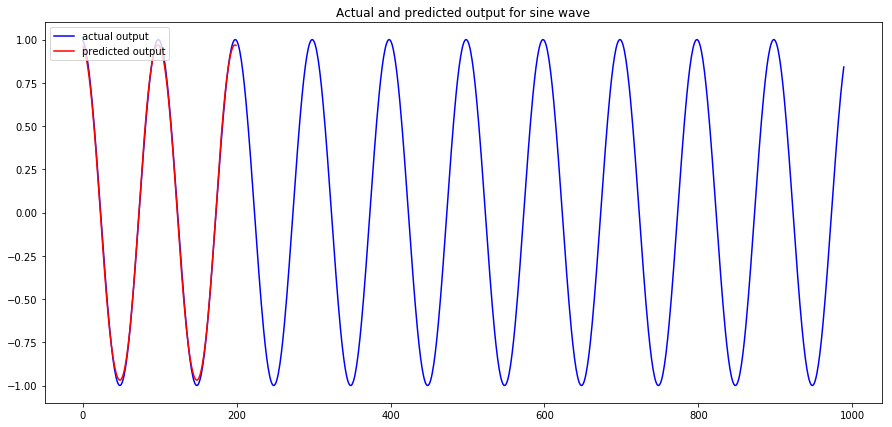

In [17]:
plt.figure(figsize=(15,7))
plt.plot(actual_output_scaled, '-b', label='actual output')
# we just visualize prediction of first 200 points because predicted and actual output overlaps completely
plt.plot(predicted_output_scaled[:200], '-r', label='predicted output')
plt.title("Actual and predicted output for sine wave")
plt.legend(loc='upper left')

Till now, we only checked our model whether it has learned the trained data. We can see in above plot that model is able to reproduce the output similar as the original one. Now, we will use LSTM to predict the future output .

Now we use moving forward window method. 

Use a moving forward window of size 50, which means we will use the first 50 data points as out input X to predict y1 — 51st data point. Next, we will use the window between 1 to 51 data points as input X to predict y2 i.e., the 52nd data point and so on

# LSTM for Future Predictions (Using Window Method)

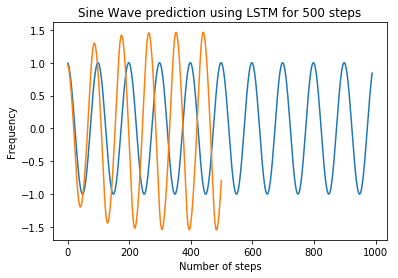

In [18]:
# print test_data_x[0]
def movingTestWindowPrediction(number_of_future_predictions, test_data_x):
    
    preds_moving = []
    moving_test_window = [test_data_x[0,:].tolist()] # Take time predictions 
    
    moving_test_window = np.array(moving_test_window)

    for i in range(number_of_future_predictions):
        
        predicted_one_step = model.predict(moving_test_window)
        
#         print "Predicted one step ", predicted_one_step
#         print "Appended predicted one step ", predicted_one_step[0][0]
        # Append each prediction in list
        preds_moving.append(predicted_one_step[0][0])
        
        predicted_one_step = predicted_one_step.reshape(1,1,1)

        # way of concatenating 3d array
        # we always maintain the size of window i.e. 50. 
        # each iteration we remove first element from window and add predicted output at the last of window
        moving_test_window = np.concatenate((moving_test_window[:,1:,:], predicted_one_step), axis=1)

    preds_moving = np.array(preds_moving)
    preds_moving = preds_moving.reshape(preds_moving.shape[0],1)
    preds_moving = scaler.inverse_transform(preds_moving)
    
    
    
    return preds_moving
    
preds_moving = movingTestWindowPrediction(500, test_data_x)
    
    
plt.plot(actual_output_scaled)
plt.plot(preds_moving)
plt.title("Sine Wave prediction using LSTM for 500 steps")
plt.xlabel("Number of steps")
plt.ylabel("Frequency")
plt.show()